In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../given/practical6/METABRIC_RNA_Mutation.csv")
data.head()

/tmp/ipykernel_14234/3798815053.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../given/practical6/METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [4]:
x = data.loc[:, [ 'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut']]
y = data["death_from_cancer"]

In [7]:
x = pd.get_dummies(x, dtype=int, drop_first=True)

In [22]:
x = x.loc[:, ~x.columns.duplicated()]

In [23]:
y = y.fillna(value="Living")
# select k-best params
suggest = SelectKBest(f_classif, k=4).fit(x, y)
cols = suggest.get_support(indices=True)

In [24]:
x.iloc[:, cols]

,hras_mut_0,smarcb1_mut_0,stmn2_mut_N145K,siah1_mut_0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1899,1,1,0,1
1900,1,1,0,1
1901,1,1,0,1
1902,1,1,0,1


In [25]:
xBest = SelectKBest(f_classif, k=4).fit_transform(x,y)

In [26]:
xScaled = StandardScaler().fit_transform(xBest)

In [27]:
# select optimium k for clustering

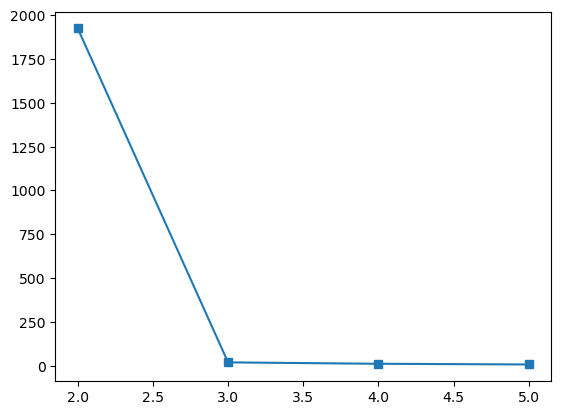

In [30]:
wcss=[]
for i in range(2, 6):
    wcss.append(KMeans(init="random", n_clusters=i, random_state=200).fit(xScaled).inertia_)

plt.plot([i for i in range(2,6)], wcss, marker="s")

In [36]:
model = KMeans(init="random", n_clusters=2).fit(xScaled)
clusters = model.predict(xScaled)
clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [37]:
x["cluster"] = clusters

In [38]:
x["cluster"].value_counts()

cluster
1    1024
0     880
Name: count, dtype: int64

In [40]:
toPlot = x.iloc[:, cols]

In [41]:
toPlot["death_from_cancer"] = y
toPlot["cluster"] =x["cluster"]
toPlot.head()

/tmp/ipykernel_14234/2586009174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toPlot["death_from_cancer"] = y
/tmp/ipykernel_14234/2586009174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toPlot["cluster"] =x["cluster"]


,hras_mut_0,smarcb1_mut_0,stmn2_mut_N145K,siah1_mut_0,death_from_cancer,cluster
0,0,0,0,0,Living,1
1,0,0,0,0,Living,1
2,0,0,0,0,Died of Disease,1
3,0,0,0,0,Living,1
4,0,0,0,0,Died of Disease,1


In [48]:
living = toPlot[toPlot["death_from_cancer"]=="Living"].groupby("cluster")["death_from_cancer"].count()
died = toPlot[toPlot["death_from_cancer"]=="Died of Disease"].groupby("cluster")["death_from_cancer"].count()
other_reasons = toPlot[toPlot["death_from_cancer"]=="Died of Other Causes"].groupby("cluster")["death_from_cancer"].count()

toPlot["death_from_cancer"].unique()

array(['Living', 'Died of Disease', 'Died of Other Causes'], dtype=object)

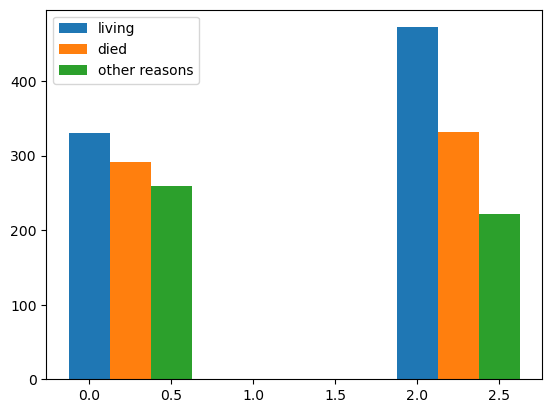

In [50]:
x=np.array([0,2])

plt.bar(x, living, label="living", width=0.25)
plt.bar(x+0.25, died, label="died",width=0.25)
plt.bar(x+0.5, other_reasons, label="other reasons", width=0.25)
plt.legend()

In [117]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [118]:
data = pd.read_csv("../given/practical6/METABRIC_RNA_Mutation.csv")
data.head()

/tmp/ipykernel_14234/3798815053.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../given/practical6/METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [119]:
data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [120]:
x =data.loc[:, ['mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut']]
y = data["death_from_cancer"]

In [121]:
y =y.fillna(value="Living")

In [122]:
x = pd.get_dummies(x, dtype=int, drop_first=True)
x

,mtap_mut_A213S,mtap_mut_A247S,mtap_mut_I138M,mtap_mut_I255L,ppp2cb_mut_G128V,ppp2cb_mut_I224S,ppp2cb_mut_R110C,ppp2cb_mut_R254Q,smarcd1_mut_L434M,smarcd1_mut_M366T,...,hras_mut_Q61R,prps2_mut_G255R,prps2_mut_I159F,smarcb1_mut_0,smarcb1_mut_D159N,smarcb1_mut_I28L,stmn2_mut_N145K,stmn2_mut_R156H,siah1_mut_0,siah1_mut_T249A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [123]:
x = x.loc[:, ~x.columns.duplicated()]

In [124]:
suggest = SelectKBest(f_classif, k=4).fit(x,y)
cols = suggest.get_support(indices=True)
cols

array([18, 23, 26, 28])

In [125]:
x.iloc[:, cols]

,hras_mut_0,smarcb1_mut_0,stmn2_mut_N145K,siah1_mut_0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1899,1,1,0,1
1900,1,1,0,1
1901,1,1,0,1
1902,1,1,0,1


In [126]:
# Decide the best
xBest = SelectKBest(f_classif, k=4).fit_transform(x,y)

In [127]:
xScaled = StandardScaler().fit_transform(xBest)

In [128]:
# select the k for clustering using elbow plot
wcss = []
vals =[]
for i in range(2, 6):
    vals.append(i)
    wcss.append(KMeans(init="random", n_clusters=i, random_state=200).fit(xScaled).inertia_)
wcss

[1923.2199368297936, 20.0797634193886, 12.049372863386075, 8.030275898865291]

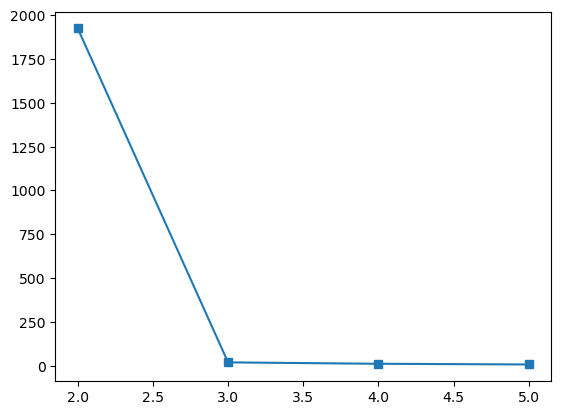

In [129]:
plt.plot(vals, wcss, marker="s")

In [130]:
model = KMeans(init="random",n_clusters=2).fit(xScaled)
clusters= model.predict(xScaled)
clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [131]:
x["cluster"] = clusters

In [132]:
toPlot =x.iloc[:, cols]
toPlot

,hras_mut_0,smarcb1_mut_0,stmn2_mut_N145K,siah1_mut_0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1899,1,1,0,1
1900,1,1,0,1
1901,1,1,0,1
1902,1,1,0,1


In [133]:
toPlot["cluster"]= x["cluster"]
toPlot["death_from_cancer"]=y



/tmp/ipykernel_14234/2807958377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toPlot["cluster"]= x["cluster"]
/tmp/ipykernel_14234/2807958377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toPlot["death_from_cancer"]=y


In [134]:
toPlot["death_from_cancer"].unique()

array(['Living', 'Died of Disease', 'Died of Other Causes'], dtype=object)

In [135]:

living = toPlot[toPlot["death_from_cancer"]=="Living"].groupby("cluster")["death_from_cancer"].count()
died = toPlot[toPlot["death_from_cancer"]=="Died of Disease"].groupby("cluster")["death_from_cancer"].count()
ot = toPlot[toPlot["death_from_cancer"]=="Died of Other Causes"].groupby("cluster")["death_from_cancer"].count()

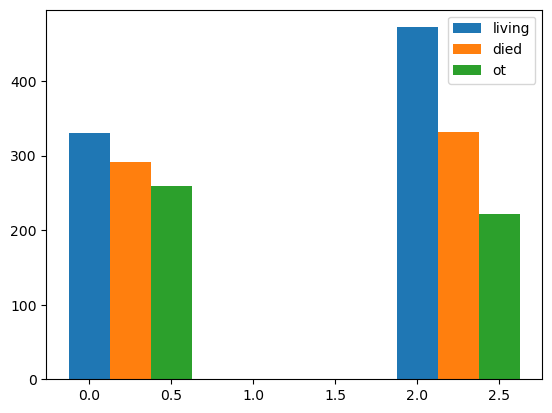

In [136]:
x =np.array([0,2])
plt.bar(x, living, label="living",width=0.25)
plt.bar(x+0.25, died, label="died", width=0.25)
plt.bar(x+0.5, ot, label="ot", width=0.25)
plt.legend()